<a href="https://colab.research.google.com/github/Debajyoti2004/coursera-test_/blob/main/Movie_genre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'genre-classification-dataset-imdb:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1417162%2F2347441%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240604%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240604T054756Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2e07c29bf565e427c99cd50fa8a58f1ae26adceac5faedddbab25895dbd27e7d013d802578538c5d5a3fae82093b2f15b6f55fe738a199602857476eb668b2451d64e03ae3f15f720d0695096f441f37cea896c3f64229f76255712494aa8cde324adc85b57f09cebe2341dc7c6ed3687628b9ffd31143f9398cd2cabbecabdb9606418c49b4dfb66e24c1ec67f5e70b4f8b9224d450dbc41be5cbc404c910dc8d6d568d13d1ad2a048d45e34a0aead3f25f89a7a297fdfa37186995fa00933e21c12cb873d26da96046c66529b9b1e22983bf873e4797158a4613bea0d03438bb06368b19a46a09482f6a2d13b0eb2489ff5bc8a0592e79facc10b3e74d206b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 43729690 bytes downloaded
Downloaded and uncompressed: genre-classification-dataset-imdb
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/description.txt
/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt


Load Training Data


In [3]:
train_path = "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt"
train_data = pd.read_csv(train_path, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


Load Testing data

In [4]:
test_path= "/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt"
test_data = pd.read_csv(test_path, sep=':::', names=['Title', 'Description'], engine='python')
test_data

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


Unique Genre present in the dataset

In [5]:
types_of_genre_in_train_data = train_data['Genre'].unique()
types_of_genre_in_train_data

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

Libraries

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Input,MultiHeadAttention, LayerNormalization, Concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score
from sklearn.naive_bayes import MultinomialNB

Model 1: using naive-bayes

In [8]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['Description'])
tfidf_vectorizer.get_feature_names_out()
y_train = train_data['Genre']

In [9]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [10]:
# Predicting the training data
y_train_pred = nb_classifier.predict(X_train_tfidf)

# Calculating the number of mislabeled points
num_mislabeled = (y_train != y_train_pred).sum()

# Printing the results
print(f"Number of mislabeled points out of a total {len(y_train)} points : {num_mislabeled}")
print("Accuracy on training set:", accuracy_score(y_train, y_train_pred))
print("Classification Report on training set:\n", classification_report(y_train, y_train_pred))


Number of mislabeled points out of a total 54214 points : 25160
Accuracy on training set: 0.5359132327443096


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report on training set:
                precision    recall  f1-score   support

      action        0.70      0.09      0.16      1315
       adult        0.79      0.05      0.10       590
   adventure        0.76      0.05      0.10       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       265
      comedy        0.56      0.45      0.50      7447
       crime        0.00      0.00      0.00       505
 documentary        0.57      0.90      0.70     13096
       drama        0.47      0.84      0.60     13613
      family        1.00      0.00      0.01       784
     fantasy        0.00      0.00      0.00       323
   game-show        1.00      0.14      0.24       194
     history        0.00      0.00      0.00       243
      horror        0.78      0.36      0.49      2204
       music        0.90      0.16      0.27       731
     musical        0.00      0.00      0.00       277
     mystery        0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_test = tfidf_vectorizer.fit_transform(test_data['Description'])

In [12]:
y_test_predictions = nb_classifier.predict(X_test)
test_data['Predicted_Genre'] = y_test_predictions

test_data

,Title,Description,Predicted_Genre
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",drama
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",documentary
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",documentary
5,Er nu zhai (1955),Before he was known internationally as a mart...,short
...,...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",drama
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,drama
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,animation
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",documentary


For Model 2: Transformer model/Multihead attention model

In [13]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(train_data['Description'])
X=tokenizer.texts_to_sequences(train_data['Description'])
X=pad_sequences(X,padding='post')
word_index=tokenizer.word_index
print(f"word_index:{word_index}")
vocab_size=len(word_index)+1
print(f"Vocabulary size: {vocab_size}")
print(f"shape of X={X.shape}")


word_index:{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'in': 6, 'is': 7, 'his': 8, 'with': 9, 'her': 10, 'he': 11, 'for': 12, 'that': 13, 'on': 14, 'as': 15, 'their': 16, 'by': 17, 'an': 18, 'from': 19, 'who': 20, 'they': 21, 'she': 22, 'this': 23, 'are': 24, 'but': 25, 'has': 26, 'it': 27, 'at': 28, 'life': 29, 'one': 30, 'when': 31, 'him': 32, 'be': 33, 'was': 34, 'all': 35, 'will': 36, 'film': 37, 'about': 38, 'into': 39, 'out': 40, 'up': 41, 'have': 42, 'new': 43, 'not': 44, 'after': 45, 'world': 46, 'them': 47, 'young': 48, 'story': 49, 'two': 50, 'love': 51, 'which': 52, 'family': 53, 'time': 54, 'what': 55, 'man': 56, 'through': 57, 'or': 58, 'only': 59, 'years': 60, 'people': 61, 'old': 62, 'more': 63, 'where': 64, 'can': 65, 'first': 66, 'other': 67, 'find': 68, 'while': 69, 'get': 70, 'been': 71, 'day': 72, 'how': 73, 'we': 74, 'lives': 75, 'also': 76, 'own': 77, 'home': 78, 'over': 79, 'most': 80, 'father': 81, 'you': 82, 'so': 83, 'there': 84, 'way': 85, 'back': 86, 'som

In [14]:
encoder=LabelEncoder()
encoder.fit(train_data['Genre'])
encoded_genre=encoder.transform(train_data['Genre'])
print(f"encoded_genre={encoded_genre}")
print(f"encoded_genre.shape={encoded_genre.shape}")
Y=to_categorical(encoded_genre)
print(f"encoded_genere={Y}")
print(f"encoded_genre.shape={Y.shape}")

encoded_genre=[ 8 24  1 ...  7  5 12]
encoded_genre.shape=(54214,)
encoded_genere=[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
encoded_genre.shape=(54214, 27)


In [15]:
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, pos, i, d_model):
        angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
        return pos * angle_rates

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(np.arange(position)[:, np.newaxis],
                                     np.arange(d_model)[np.newaxis, :],
                                     d_model)

        # Apply sin to even indices in the array; 2i
        angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

        # Apply cos to odd indices in the array; 2i+1
        angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

        pos_encoding = angle_rads[np.newaxis, ...]
        return tf.cast(pos_encoding, dtype=tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]


In [16]:
class ForwardBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, ff_dim):
        super(ForwardBlock, self).__init__()
        self.dense1 = Dense(ff_dim, activation='relu')
        self.dense2 = Dense(embed_dim)

    def call(self, input):
        dense1 = self.dense1(input)
        dense2 = self.dense2(dense1)
        return dense2


In [17]:
class TransformerBlock(tf.keras.layers.Layer):
  def __init__(self,embed_dim,num_heads,ff_dim,rate=0.1):
    super(TransformerBlock,self).__init__()
    self.att=MultiHeadAttention(num_heads=num_heads,key_dim=embed_dim)
    self.ffn=ForwardBlock(embed_dim,ff_dim)
    self.layernorm1=LayerNormalization(epsilon=1e-6)
    self.layernorm2=LayerNormalization(epsilon=1e-6)
    self.dropout1=Dropout(rate)
    self.dropout2=Dropout(rate)

  def call(self,inputs,training):
    attn_output=self.att(inputs,inputs)
    attn_output=self.dropout1(attn_output,training=training)
    out1=self.layernorm1(inputs+attn_output)

    ffn_output=self.ffn(out1)
    ffn_output=self.dropout2(ffn_output,training=training)
    out2=self.layernorm2(out1+ffn_output)
    return out2

In [18]:
def Transformer(vocab_size, d_model, num_heads, ff_dim, maxlen, num_classes):
    inputs = tf.keras.layers.Input(shape=(maxlen,))
    embedding_layer = tf.keras.layers.Embedding(vocab_size, d_model)
    x = embedding_layer(inputs)

    positional_encoding = PositionalEncoding(maxlen, d_model)
    x = positional_encoding(x)

    transformer_block = TransformerBlock(d_model, num_heads, ff_dim)
    x = transformer_block(x)

    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    x = tf.keras.layers.Dense(20, activation="relu")(x)
    x = tf.keras.layers.Dropout(0.1)(x)
    outputs = tf.keras.layers.Dense(num_classes, activation="softmax")(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1834)]            0         
                                                                 
 embedding (Embedding)       (None, 1834, 64)          8866432   
                                                                 
 positional_encoding (Posit  (None, 1834, 64)          0         
 ionalEncoding)                                                  
                                                                 
 transformer_block (Transfo  (None, 1834, 64)          66624     
 rmerBlock)                                                      
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                             

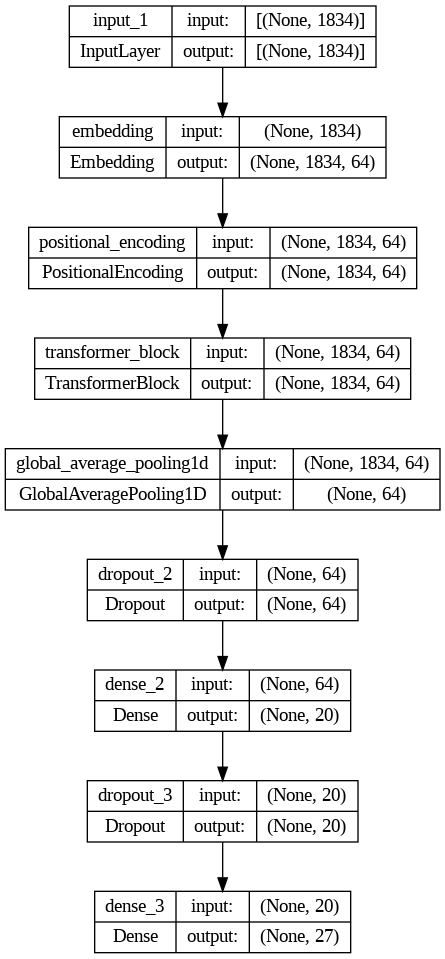

In [19]:
#plot_model
from tensorflow.keras.utils import plot_model
d_model = 64
num_heads = 3
ff_dim = 128
maxlen = X.shape[1]
num_classes = Y.shape[1]


model=Transformer(vocab_size,d_model,num_heads,ff_dim,maxlen,num_classes)
model.summary()
plot_model(model,show_shapes=True)

In [20]:
#Define callbacks

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

def lr_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(lr_scheduler)

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_history=model.fit(X, Y, epochs=5, batch_size=100, callbacks=[early_stopping, learning_rate_scheduler])

Epoch 1/5
543/543 [==============================] - 412s 746ms/step - loss: 2.3372 - accuracy: 0.3235 - lr: 0.0010
Epoch 2/5
543/543 [==============================] - 408s 752ms/step - loss: 1.8354 - accuracy: 0.4814 - lr: 0.0010
Epoch 3/5
543/543 [==============================] - 410s 755ms/step - loss: 1.5565 - accuracy: 0.5521 - lr: 0.0010
Epoch 4/5
543/543 [==============================] - 408s 751ms/step - loss: 1.2770 - accuracy: 0.6285 - lr: 0.0010
Epoch 5/5
543/543 [==============================] - 407s 750ms/step - loss: 1.0071 - accuracy: 0.7060 - lr: 0.0010


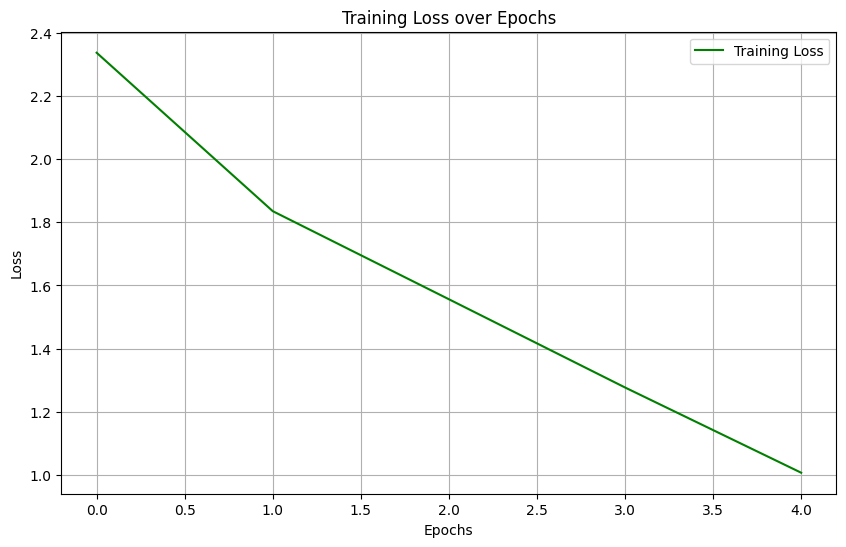

In [22]:
train_loss = model_history.history['loss']

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, color='g', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend(loc='best')
plt.grid(True)
plt.show()

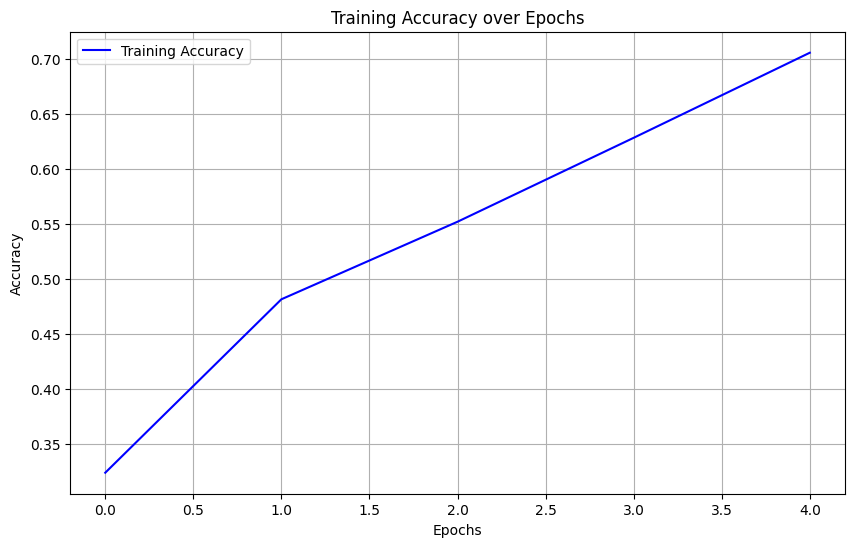

In [23]:
train_accuracy = model_history.history['accuracy']

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_accuracy, color='b', label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [24]:

def no_of_genre_matches(Y_pred, Y_true):
    return np.sum(np.array(Y_pred) == np.array(Y_true))

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(model, X, Y, encoder):
    # Predicting the values
    Y_pred = model.predict(X)

    # If the output is probabilities, convert them to class labels
    Y_pred_class = np.argmax(Y_pred, axis=1)
    Y_true_class = np.argmax(Y, axis=1)

    # Inverse transform to get the genre names
    Y_pred_genre = encoder.inverse_transform(Y_pred_class)
    Y_true_genre = encoder.inverse_transform(Y_true_class)

    # Calculate and print evaluation metrics
    accuracy = accuracy_score(Y_true_class, Y_pred_class)
    precision = precision_score(Y_true_class, Y_pred_class, average='weighted')
    recall = recall_score(Y_true_class, Y_pred_class, average='weighted')
    f1 = f1_score(Y_true_class, Y_pred_class, average='weighted')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Calculate and print the number of genre matches
    genre_matches = no_of_genre_matches(Y_pred_genre, Y_true_genre)
    print(f"Number of genre matches: {genre_matches}")

# Example usage with training data
print(f"Training data:")
evaluate_model(model, X, Y, encoder)


Training data:
1695/1695 [==============================] - 159s 94ms/step
Accuracy: 0.7900911203748109
Precision: 0.7503290703827348
Recall: 0.7900911203748109
F1 Score: 0.7567277188945931
Number of genre matches: 42834


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
X_test = tokenizer.texts_to_sequences(test_data['Description'])
X_test = pad_sequences(X_test, padding='post', maxlen=1834)  # Use maxlen instead of max_len
print(f"Shape of test example: {X_test.shape}")

Shape of test example: (54200, 1834)


In [31]:
Y_pred_test=model.predict(X_test)
Y_pred_test=np.argmax(Y_pred_test,axis=1)
Y_pred_test_genre=encoder.inverse_transform(Y_pred_test)

1694/1694 [==============================] - 159s 94ms/step


In [32]:
test_data['Genre']=Y_pred_test_genre
test_data.head()

,Title,Description,Predicted_Genre,Genre
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",drama,drama
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",documentary,drama
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,documentary,documentary
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",documentary,drama
5,Er nu zhai (1955),Before he was known internationally as a mart...,short,documentary
